# Analyse Salle 3 du PTI à l'HEGP

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
EXPORTPATH = "Data/Export/"
SAVEPATH = "Data/Output/"

STATISTICS = ["min", "max", "mediane", "75ième centile", "VGD", "NRD"]#, "Ecart-type (%)"]

def get_stats(serie: pd.Series, NRD: float=None, VGD: float=None) -> list:
    return [
        np.min(serie), 
        np.max(serie),
        np.median(serie), 
        np.quantile(serie, .75),
        VGD, NRD,
        #((np.quantile(serie, .75) - NRD) / NRD) * 100 if NRD is not None else None,
    ]


def get_ampli_stats(df: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame(data={
        "Statistics": STATISTICS,
        "PDS (cGy.cm²)": get_stats(df["PDS total AB (cGy.cm²)"]),#, NRD_PDS, VGD_PDS),
        "Kair (mGy)": get_stats(df["Dose totale AB (mGy)"]),#, NRD_Kair),
        "Temps de scopie (min)": get_stats(df["Temps total AB (min)"]),#, NRD_temps_scopie, VGD_temps_scopie),
    }).set_index("Statistics")

In [26]:
salle3_2023 = pd.read_excel(EXPORTPATH + "Export_Salle3_2023.xlsx", skiprows=[i for i in range(13)])
salle3_2024 = pd.read_excel(EXPORTPATH + "Export_Salle3_2024.xlsx", skiprows=[i for i in range(13)])

N patients = 1623 



Text(0.5, 1.0, 'Actes réalisés en salle 3 PTI en 2023')

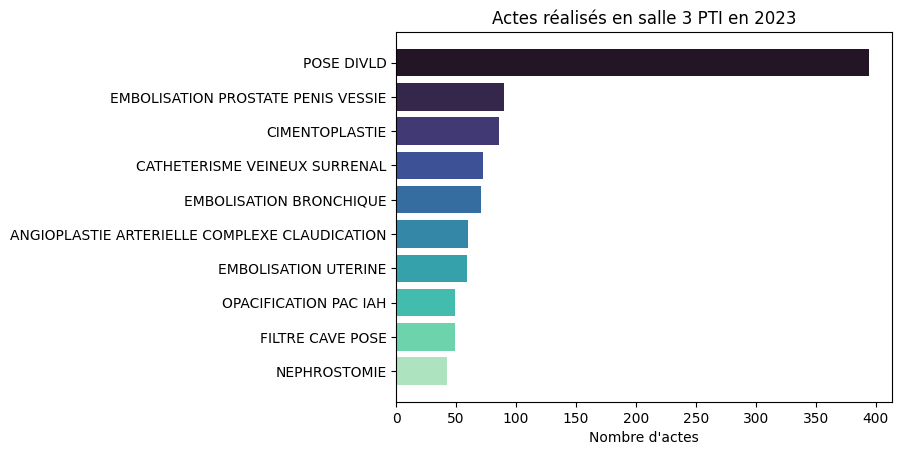

In [27]:
def actes(df: pd.DataFrame) -> pd.DataFrame:
    df = df.sort_values(by=["Date"])
    df = df.drop_duplicates(subset=["ID examen"])
    df = df.dropna(subset=["Num. d'accès"])
    print(f"N patients = {len(df)} \n")
    return df

actes_2023 = actes(salle3_2023)
freq_actes_2023 = pd.DataFrame(actes_2023["Procédure"].value_counts()).sort_values(by="count",ascending=True)
#print(freq_actes_2023)

color=list(reversed(sns.color_palette('mako', n_colors=10)))
plt.figure()
plt.barh(freq_actes_2023.index[-10:],freq_actes_2023["count"][-10:], color=color)
plt.xlabel("Nombre d'actes")
plt.title("Actes réalisés en salle 3 PTI en 2023")

NEPHROSTOMIE  : PDS = 672.831  cGy.cm²
FILTRE CAVE POSE  : PDS = 1570.622  cGy.cm²
OPACIFICATION PAC IAH  : PDS = 1539.318  cGy.cm²
EMBOLISATION UTERINE  : PDS = 8436.705  cGy.cm²
ANGIOPLASTIE ARTERIELLE COMPLEXE CLAUDICATION  : PDS = 1969.37  cGy.cm²
EMBOLISATION BRONCHIQUE  : PDS = 8461.424  cGy.cm²
CATHETERISME VEINEUX SURRENAL  : PDS = 9168.111  cGy.cm²
CIMENTOPLASTIE  : PDS = 8951.259  cGy.cm²
EMBOLISATION PROSTATE PENIS VESSIE  : PDS = 26236.962  cGy.cm²
POSE DIVLD  : PDS = 98.946  cGy.cm²


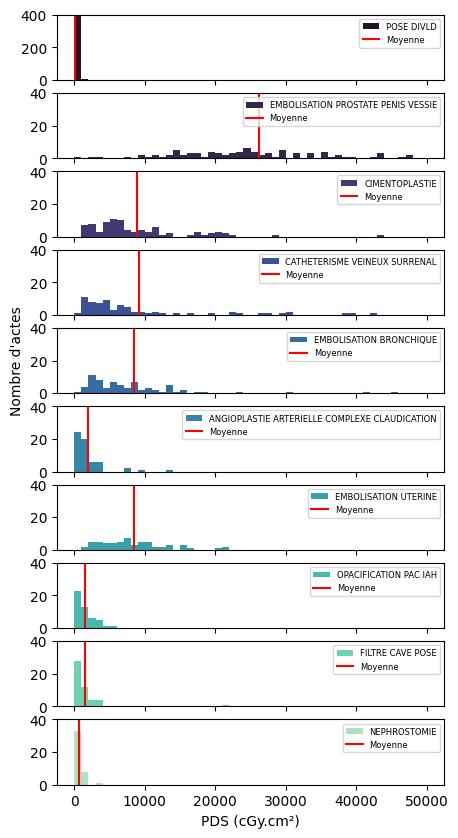

In [28]:
dataset=pd.DataFrame()
dataset["PDS"]=actes_2023["PDS total AB (cGy.cm²)"]
dataset["Procédure"]=actes_2023["Procédure"]

color=list(sns.color_palette('mako', n_colors=10))

fig,axs=plt.subplots(10,1,sharex=True, figsize=(5,10))
i=10
for procedure in freq_actes_2023.index[-10:]:
    axs[i-1].hist(dataset['PDS'].loc[dataset["Procédure"] == procedure], 
                  range=(0,50000), bins=50,
                  color=color[i-1],label=procedure)
    if procedure == "POSE DIVLD":
        axs[i-1].set_ylim((0,400))
        axs[i-1].plot([np.mean(dataset['PDS'].loc[dataset["Procédure"] == procedure]), np.mean(dataset['PDS'].loc[dataset["Procédure"] == procedure])],
                  [0,400],'r', label='Moyenne')
    else:
        axs[i-1].set_ylim((0,40))
        axs[i-1].plot([np.mean(dataset['PDS'].loc[dataset["Procédure"] == procedure]), np.mean(dataset['PDS'].loc[dataset["Procédure"] == procedure])],
                  [0,40],'r', label='Moyenne')
    axs[i-1].legend(loc ="upper right",fontsize="6")
    axs[i-1].xaxis.set_tick_params(labelsize=10)
    axs[i-1].yaxis.set_tick_params(labelsize=10)
    axs[9].set_xlabel("PDS (cGy.cm²)",fontsize="10")
    axs[4].set_ylabel("Nombre d'actes",fontsize="10")

    print(procedure, " : PDS =", np.round(np.mean(dataset['PDS'].loc[dataset["Procédure"] == procedure]),3), " cGy.cm²")

    i-=1

NEPHROSTOMIE  : Kair = 18.753  mGy
FILTRE CAVE POSE  : Kair = 41.008  mGy
OPACIFICATION PAC IAH  : Kair = 42.804  mGy
EMBOLISATION UTERINE  : Kair = 344.166  mGy
ANGIOPLASTIE ARTERIELLE COMPLEXE CLAUDICATION  : Kair = 83.64  mGy
EMBOLISATION BRONCHIQUE  : Kair = 358.899  mGy
CATHETERISME VEINEUX SURRENAL  : Kair = 354.771  mGy
CIMENTOPLASTIE  : Kair = 475.297  mGy
EMBOLISATION PROSTATE PENIS VESSIE  : Kair = 1096.903  mGy
POSE DIVLD  : Kair = 2.6  mGy


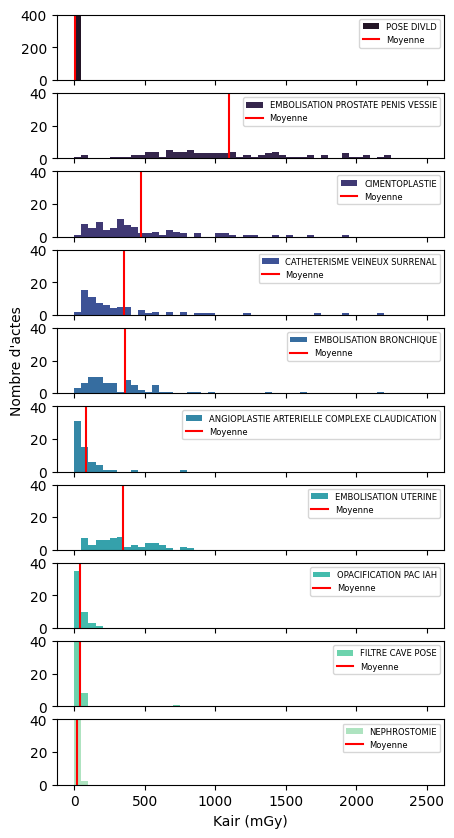

In [29]:
dataset=pd.DataFrame()
dataset["Kair"]=actes_2023["Dose totale AB (mGy)"]
dataset["Procédure"]=actes_2023["Procédure"]

color=list(sns.color_palette('mako', n_colors=10))

fig,axs=plt.subplots(10,1,sharex=True, figsize=(5,10))
i=10
for procedure in freq_actes_2023.index[-10:]:
    axs[i-1].hist(dataset['Kair'].loc[dataset["Procédure"] == procedure], 
                #   bins=len(dataset['PDS'].loc[dataset["Procédure"] == procedure])//10,
                  range=(0,2500), bins=50,
                  color=color[i-1],label=procedure)
    if procedure == "POSE DIVLD":
        axs[i-1].set_ylim((0,400))
        axs[i-1].plot([np.mean(dataset['Kair'].loc[dataset["Procédure"] == procedure]), np.mean(dataset['Kair'].loc[dataset["Procédure"] == procedure])],
                  [0,400],'r', label='Moyenne')
    else:
        axs[i-1].set_ylim((0,40))
        axs[i-1].plot([np.mean(dataset['Kair'].loc[dataset["Procédure"] == procedure]), np.mean(dataset['Kair'].loc[dataset["Procédure"] == procedure])],
                  [0,40],'r', label='Moyenne')
    axs[i-1].legend(loc ="upper right",fontsize="6")
    axs[i-1].xaxis.set_tick_params(labelsize=10)
    axs[i-1].yaxis.set_tick_params(labelsize=10)
    axs[9].set_xlabel("Kair (mGy)",fontsize="10")
    axs[4].set_ylabel("Nombre d'actes",fontsize="10")

    print(procedure, " : Kair =", np.round(np.mean(dataset['Kair'].loc[dataset["Procédure"] == procedure]),3), " mGy")

    i-=1

NEPHROSTOMIE  : Temps de scopie = 2.112  min
FILTRE CAVE POSE  : Temps de scopie = 1.628  min
OPACIFICATION PAC IAH  : Temps de scopie = 0.444  min
EMBOLISATION UTERINE  : Temps de scopie = 18.981  min
ANGIOPLASTIE ARTERIELLE COMPLEXE CLAUDICATION  : Temps de scopie = 20.286  min
EMBOLISATION BRONCHIQUE  : Temps de scopie = 25.702  min
CATHETERISME VEINEUX SURRENAL  : Temps de scopie = 14.945  min
CIMENTOPLASTIE  : Temps de scopie = 11.739  min
EMBOLISATION PROSTATE PENIS VESSIE  : Temps de scopie = 28.965  min
POSE DIVLD  : Temps de scopie = 0.865  min


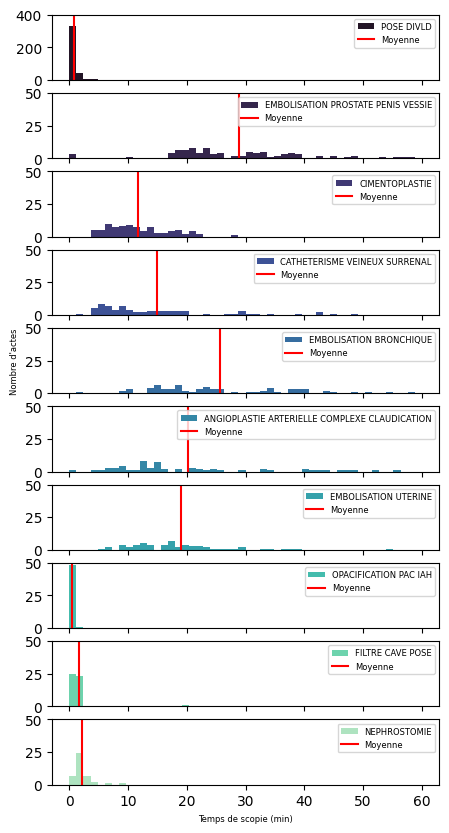

In [30]:
dataset=pd.DataFrame()
dataset["Temps"]=actes_2023["Temps total AB (min)"]
dataset["Procédure"]=actes_2023["Procédure"]

color=list(sns.color_palette('mako', n_colors=10))

fig,axs=plt.subplots(10,1,sharex=True, figsize=(5,10))
i=10
for procedure in freq_actes_2023.index[-10:]:
    axs[i-1].hist(dataset['Temps'].loc[dataset["Procédure"] == procedure], 
                #   bins=len(dataset['PDS'].loc[dataset["Procédure"] == procedure])//10,
                  range=(0,60), bins=50,
                  color=color[i-1],label=procedure)
    if procedure == "POSE DIVLD":
        axs[i-1].set_ylim((0,400))
        axs[i-1].plot([np.mean(dataset['Temps'].loc[dataset["Procédure"] == procedure]), np.mean(dataset['Temps'].loc[dataset["Procédure"] == procedure])],
                  [0,400],'r', label='Moyenne')
    else:
        axs[i-1].set_ylim((0,50))
        axs[i-1].plot([np.mean(dataset['Temps'].loc[dataset["Procédure"] == procedure]), np.mean(dataset['Temps'].loc[dataset["Procédure"] == procedure])],
                  [0,50],'r', label='Moyenne')
    axs[i-1].legend(loc ="upper right",fontsize="6")
    axs[i-1].xaxis.set_tick_params(labelsize=10)
    axs[i-1].yaxis.set_tick_params(labelsize=10)
    axs[9].set_xlabel("Temps de scopie (min)",fontsize="6")
    axs[4].set_ylabel("Nombre d'actes",fontsize="6")
    
    print(procedure, " : Temps de scopie =", np.round(np.mean(dataset['Temps'].loc[dataset["Procédure"] == procedure]),3), " min")

    i-=1
    

Année 2023
N patients = 1623 

N patients = 90 

Année 2024
N patients = 265 

N patients = 22 

Année 2023
                PDS (cGy.cm²)   Kair (mGy)  Temps de scopie (min)
Statistics                                                       
min                      12.7     0.300385                 0.1000
max                   68839.0  3038.990000                87.7000
mediane               24412.4   970.690000                25.8300
75ième centile        33462.0  1418.850000                35.6625
VGD                       NaN          NaN                    NaN
NRD                       NaN          NaN                    NaN


Année 2024
                PDS (cGy.cm²)  Kair (mGy)  Temps de scopie (min)
Statistics                                                      
min                   2391.50     54.2472                  0.300
max                  54504.80   2892.2300                 78.630
mediane              29412.30   1374.1850                 31.315
75ième centile       39905

C:\Users\mguillou\AppData\Local\Temp\ipykernel_19568\3320703608.py:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax[0].axvline(float(embolisation_prostate_2024[embolisation_prostate_2024["Nom patient"]=="RICHARD^LUC"]["PDS total AB (cGy.cm²)"]),
C:\Users\mguillou\AppData\Local\Temp\ipykernel_19568\3320703608.py:43: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax[1].axvline(float(embolisation_prostate_2024[embolisation_prostate_2024["Nom patient"]=="RICHARD^LUC"]["Dose totale AB (mGy)"]),
C:\Users\mguillou\AppData\Local\Temp\ipykernel_19568\3320703608.py:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ax[2].axvline(float(embolisation_prostate_2024[embolisation_prostate_2024["Nom patient"]

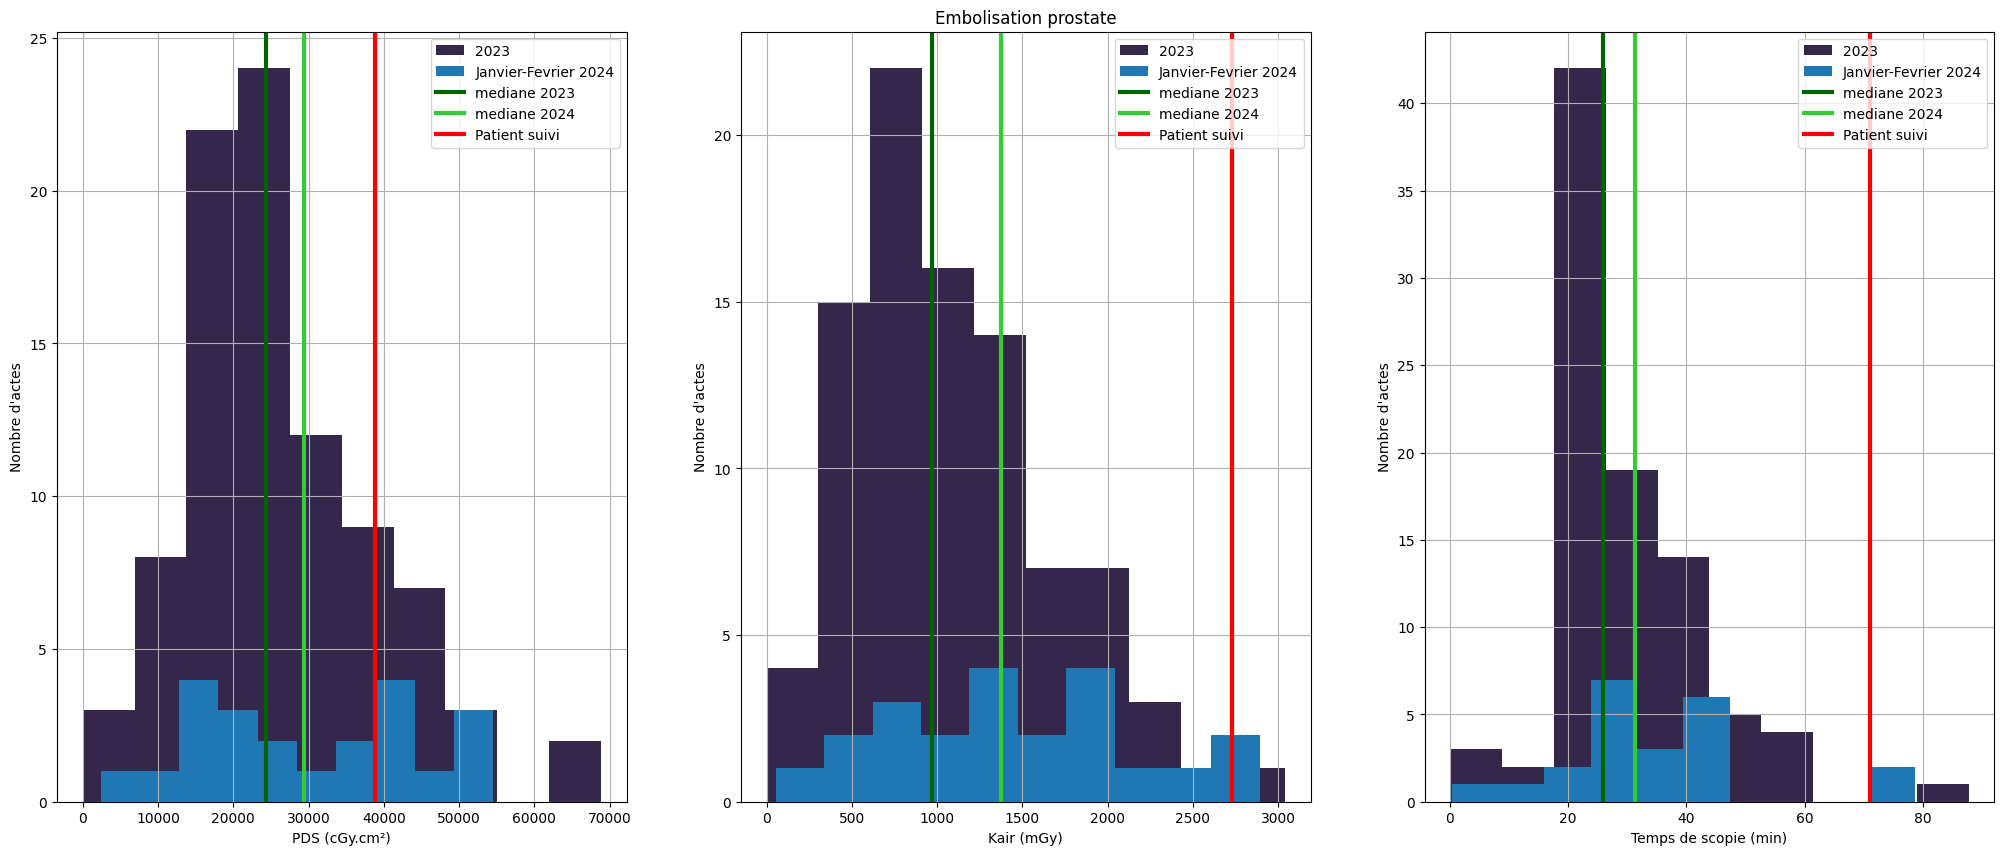

In [34]:
def embolisation_prostate(df: pd.DataFrame):
    df = df.loc[df["Procédure"]=="EMBOLISATION PROSTATE PENIS VESSIE"]
    print(f"N patients = {len(df)} \n")
    return df 

print("Année 2023")
embolisation_prostate_2023 = embolisation_prostate(actes(salle3_2023))

print("Année 2024")
embolisation_prostate_2024 = embolisation_prostate(actes(salle3_2024))

stats_2023 = get_ampli_stats(embolisation_prostate_2023)
stats_2024 = get_ampli_stats(embolisation_prostate_2024)

print("Année 2023")
print(stats_2023)
print("\n")

print("Année 2024")
print(stats_2024)
print("\n")

_, ax = plt.subplots(1, 3, figsize=(25,10))

ax[0].hist(embolisation_prostate_2023["PDS total AB (cGy.cm²)"], bins=10, rwidth=1, color=color[1], label="2023")
ax[0].hist(embolisation_prostate_2024["PDS total AB (cGy.cm²)"], bins=10, rwidth=1, label="Janvier-Fevrier 2024")
ax[0].set_xlabel("PDS (cGy.cm²)")
ax[0].set_ylabel("Nombre d'actes")
ax[0].axvline(stats_2023.at["mediane", "PDS (cGy.cm²)"], color="darkgreen", lw= 3, label="mediane 2023")
ax[0].axvline(stats_2024.at["mediane", "PDS (cGy.cm²)"], color="limegreen", lw= 3, label="mediane 2024")
ax[0].axvline(float(embolisation_prostate_2024[embolisation_prostate_2024["Nom patient"]=="RICHARD^LUC"]["PDS total AB (cGy.cm²)"]), 
              color="r", lw= 3, label="Patient suivi")
ax[0].grid(True)
ax[0].legend()

ax[1].set_title("Embolisation prostate")
ax[1].hist(embolisation_prostate_2023["Dose totale AB (mGy)"], bins=10, rwidth=1, color=color[1], label="2023")
ax[1].hist(embolisation_prostate_2024["Dose totale AB (mGy)"], bins=10, rwidth=1, label="Janvier-Fevrier 2024")
ax[1].set_xlabel("Kair (mGy)")
ax[1].set_ylabel("Nombre d'actes")
ax[1].axvline(stats_2023.at["mediane", "Kair (mGy)"],  color="darkgreen", lw= 3, label="mediane 2023")
ax[1].axvline(stats_2024.at["mediane", "Kair (mGy)"], color="limegreen", lw= 3, label="mediane 2024")
ax[1].axvline(float(embolisation_prostate_2024[embolisation_prostate_2024["Nom patient"]=="RICHARD^LUC"]["Dose totale AB (mGy)"]), 
              color="r", lw= 3, label="Patient suivi")
ax[1].grid(True)
ax[1].legend()

ax[2].hist(embolisation_prostate_2023["Temps total AB (min)"], bins=10, rwidth=1, color=color[1], label="2023")
ax[2].hist(embolisation_prostate_2024["Temps total AB (min)"], bins=10, rwidth=1, label="Janvier-Fevrier 2024")
ax[2].set_xlabel("Temps de scopie (min)")
ax[2].set_ylabel("Nombre d'actes")
ax[2].axvline(stats_2023.at["mediane", "Temps de scopie (min)"], color="darkgreen", lw= 3, label="mediane 2023")
ax[2].axvline(stats_2024.at["mediane", "Temps de scopie (min)"], color="limegreen", lw= 3, label="mediane 2024")
ax[2].axvline(float(embolisation_prostate_2024[embolisation_prostate_2024["Nom patient"]=="RICHARD^LUC"]["Temps total AB (min)"]), 
              color="r", lw= 3, label="Patient suivi")
ax[2].grid(True)
ax[2].legend()

In [35]:
print(float(embolisation_prostate_2024[embolisation_prostate_2024["Nom patient"]=="RICHARD^LUC"]["Dose totale AB (mGy)"]))


2730.47


C:\Users\mguillou\AppData\Local\Temp\ipykernel_19568\1274218586.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(float(embolisation_prostate_2024[embolisation_prostate_2024["Nom patient"]=="RICHARD^LUC"]["Dose totale AB (mGy)"]))
